<a href="https://colab.research.google.com/github/karthik038/Assignment5_6_7-Task6/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [4]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [5]:
gr_temp = df[['Ground Temperature']]
chirps_per_sec = df[['Chirps/Second']]

chirps_per_sec.head()

,Chirps/Second
0,20.0
1,16.0
2,19.8
3,18.4
4,17.1


In [6]:
regressor = linear_model.LinearRegression()
regressor.fit(gr_temp, chirps_per_sec)

LinearRegression()

### Ground Cricket Chirps, Task 1

In [7]:
print('Intercept:', regressor.intercept_)
print('Coefficient:', regressor.coef_)

Intercept: [0.45931465]
Coefficient: [[0.20299973]]


In [8]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(float(regressor.coef_[0]), float(regressor.intercept_)))

Linear Regression Equation: y = 0.2030 * x + 0.4593


### Ground Cricket Chirps, Task 2

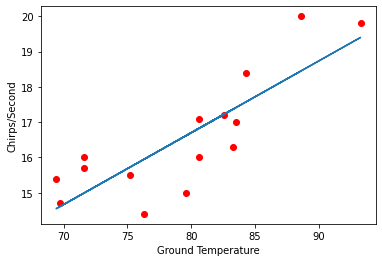

In [9]:
plt.scatter(gr_temp, chirps_per_sec, color='r')
plt.plot(gr_temp, regressor.predict(gr_temp))
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

### Ground Cricket Chirps, Task 3

In [10]:
print('R-squared: ', round(regressor.score(gr_temp, chirps_per_sec), 3))

R-squared:  0.692


### Ground Cricket Chirps, Task 4


In [12]:
print('If the ground temperature reached 95, the approximate chirps/second would be: {:.4f}'.format(float(regressor.predict([[95]])[0])))

If the ground temperature reached 95, the approximate chirps/second would be: 19.7443


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### Ground Cricket Chirps, Task 5

In [14]:
exp_temp = (18 - regressor.intercept_) / regressor.coef_
print('With an observation of 18 chirps/second','expected ground temperature is of {:.3f}˚F'.format(float(exp_temp)))

With an observation of 18 chirps/second expected ground temperature is of 86.407˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [16]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [17]:
body = df[['Body']]
brain = df[['Brain']]

body.head()
brain.head()

,Brain
0,3.385
1,0.480
2,1.350
3,465.000
4,36.330


In [18]:
bb_regressor = linear_model.LinearRegression()

In [19]:
bb_regressor.fit(brain, body)

LinearRegression()

### Brain vs. Body Weight, Task 1

In [20]:
print('Intercept:', bb_regressor.intercept_)
print('Coefficient:', bb_regressor.coef_)

Intercept: [91.00439621]
Coefficient: [[0.96649637]]


In [21]:
print('Linear Regression Equation: y = {:.4f} * x + {:.3f}'
      .format(float(bb_regressor.coef_[0]), float(bb_regressor.intercept_)))

Linear Regression Equation: y = 0.9665 * x + 91.004


### Brain vs. Body Weight, Task 2

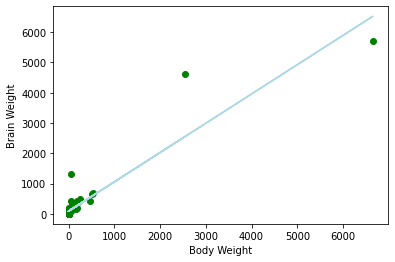

In [23]:
plt.scatter(brain, body, color='g')
plt.plot(brain, bb_regressor.predict(brain), color='lightblue')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

### Brain vs. Body Weight, Task 3

In [24]:
print('R-squared: ', round(bb_regressor.score(brain, body), 3))

R-squared:  0.873


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [25]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [26]:
salary_ft_cols = df[["Sex", "Rank", "Year", "Degree", "YSdeg"]]
salary = df[['Salary']]

In [27]:
sd_regressor = linear_model.LinearRegression()
sd_regressor.fit(salary_ft_cols, salary)

LinearRegression()

### Salary Discrimination, Task 1

In [28]:
print('Intercept:', sd_regressor.intercept_)
print('Coefficients:', sd_regressor.coef_)

Intercept: [11410.14654726]
Coefficients: [[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
   -128.79057354]]


In [29]:
salary_ft_cols_names = ["Sex", "Rank", "Year", "Degree", "YSdeg"]

print('The equation for columns {} with respect to Salary:\n'
      '{} + {}'.format(salary_ft_cols_names, sd_regressor.coef_, sd_regressor.intercept_))

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
   -128.79057354]] + [11410.14654726]


### Salary Discrimination, Task 2

In [30]:
all_five_ft = sd_regressor.score(salary_ft_cols, salary)
all_five_ft_intercept = sd_regressor.intercept_
all_five_ft_coefficient = sd_regressor.coef_
print("All Five R-squared Score: ", all_five_ft)
print("Intercept for all Five: ", all_five_ft_intercept)
print("All Five Coefficients: ", all_five_ft_coefficient)

All Five R-squared Score:  0.8547180674410969
Intercept for all Five:  [11410.14654726]
All Five Coefficients:  [[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
   -128.79057354]]


The combination of all five columns performs best at 0.855. But, Sex alone is apparently not correlated to Salary.

In [32]:
SRYD_salary_cols = df[["Sex", "Rank", "Year", "Degree"]]
SRYD_regressor = linear_model.LinearRegression()
SRYD_regressor.fit(SRYD_salary_cols, salary)

SRYD = SRYD_regressor.score(SRYD_salary_cols, salary)
SRYD_intercept = SRYD_regressor.intercept_
SRYD_coefficient = SRYD_regressor.coef_
print("Sex, Rank, Year, & Degree R-squared Score: ", SRYD)
print("Sex, Rank, Year, & Degree Intecercept", SRYD_intercept)
print("Sex, Rank, Year, & Degree Coefficients: ", SRYD_coefficient)

Sex, Rank, Year, & Degree R-squared Score:  0.845547641297936
Sex, Rank, Year, & Degree Intecercept [11101.27364777]
Sex, Rank, Year, & Degree Coefficients:  [[ 608.10026674 4753.16913715  391.84035843 -134.21945255]]


In [33]:
SRY_salary_cols = df[["Sex", "Rank", "Year"]]
SRY_regressor = linear_model.LinearRegression()
SRY_regressor.fit(SRY_salary_cols, salary)

SRY = SRY_regressor.score(SRY_salary_cols, salary)
SRY_intercept = SRY_regressor.intercept_
SRY_coefficient = SRY_regressor.coef_
print("Sex, Rank, & Year R-squared Score: ", SRY)
print("Sex, Rank, & Year Intecercept", SRY_intercept)
print("Sex, Rank, & Year Coefficients: ", SRY_coefficient)

Sex, Rank, & Year R-squared Score:  0.8454319861987166
Sex, Rank, & Year Intecercept [11011.76286539]
Sex, Rank, & Year Coefficients:  [[ 603.77322722 4747.1829411   393.86147574]]


In [34]:
SR_salary_cols = df[["Sex", "Rank"]]
SR_regressor = linear_model.LinearRegression()
SR_regressor.fit(SR_salary_cols, salary)

SR = SR_regressor.score(SR_salary_cols, salary)
SR_intercept = SR_regressor.intercept_
SR_coefficient = SR_regressor.coef_
print("Sex & Rank R-squared Score: ", SR)
print("Sex & Rank Intecercept", SR_intercept)
print("Sex & Rank Coefficients: ", SR_coefficient)


Sex & Rank R-squared Score:  0.7554917749443395
Sex & Rank Intecercept [12041.93823283]
Sex & Rank Coefficients:  [[-738.12667504 5864.44325796]]


In [35]:
sex_salary_col = df[["Sex"]]
sex_regressor = linear_model.LinearRegression()
sex_regressor.fit(sex_salary_col, salary)

sex = sex_regressor.score(sex_salary_col, salary)
sex_intercept = sex_regressor.intercept_
sex_coefficient = sex_regressor.coef_
print("Sex R-squared Score: ", sex)
print("Sex Intecercept", sex_intercept)
print("Sex Coefficients: ", sex_coefficient)

Sex R-squared Score:  0.06389892583288004
Sex Intecercept [24696.78947368]
Sex Coefficients:  [[-3339.64661654]]


### Salary Discrimination, Task 3

* From aboe, we can see that the R-squred value of sex column is close to zero, i.e., 0.06389892583288004 which indicates that sex does not affect the salary that much. It has no direct influence on salary. Hence we can conclude that sex is not an effective factor in deciding salary.